In [1]:
from LKF import *
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [26]:
def plot_true_c(x,z,xest,xpred,dt):
    fig, ax  = plt.subplots(2,1, figsize = (12,10)) 
    dims=np.shape(x)
    tsteps=dims[0]
    t=np.linspace(0,dt*tsteps,tsteps)
    
    ax[0].plot(t, x[:,0,0], label='Xtrue')
    ax[0].plot(t, z[:,0,0], label='Ztrue')
    ax[0].plot(t, xest[:,0,0], label='Xest')
    ax[0].plot(t, xpred[:,0,0], label='Xpred')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Position')
    ax[0].set_title("True Motion and Observations")
    ax[0].legend()
    
    ax[1].plot(t, xest[:,1,0], label='Velocity Estimated')
    ax[1].plot(t, xpred[:,1,0], label='Velocity Predicted')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Velocity')
    ax[1].set_title("Velocity from KF")
    ax[1].legend()

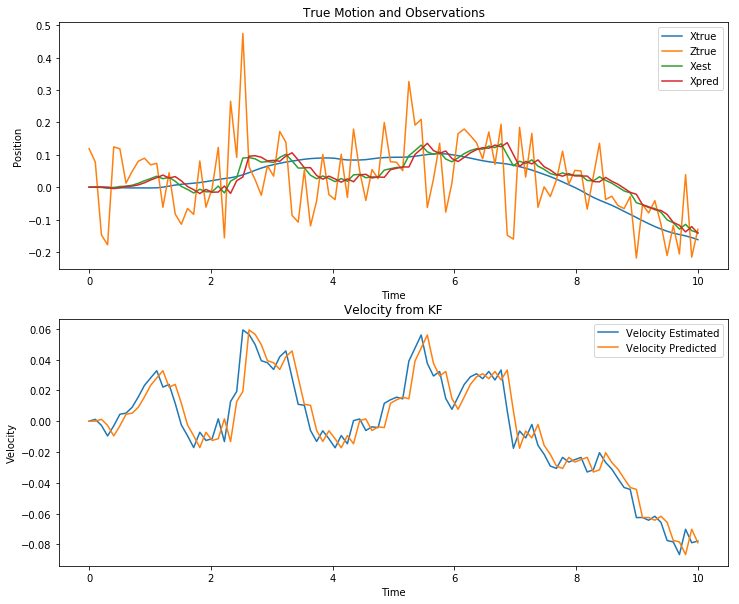

In [27]:
# set up
nt=100
dt=0.1
F=np.array([[1,dt],[0,1]])
G=np.array([[dt*dt/2],[dt]])
H=np.array([1.0,0])
B=np.array([1.0])
qstd=0.1
rstd=0.1
x0=np.array([[0],[0]])

# simulate
xt=xtrue(F,G,qstd,x0,dt,nt)
zt=obs(xt,H,rstd)
# estimate
xest,Pest,xpred,Ppred,dz,S=lkf(F,G,H,B,qstd,rstd,zt,x0)
#plot
plot_true_c(xt,zt,xest,xpred,dt)


### Modifying Q and R

Increase confidence in process Q:0.1 -> 0.001

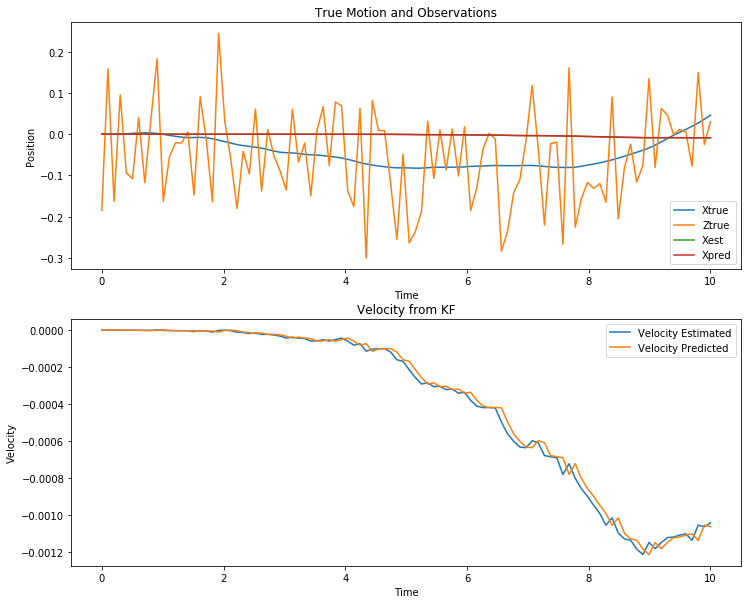

In [32]:
# set up
nt=100
dt=0.1
F=np.array([[1,dt],[0,1]])
G=np.array([[dt*dt/2],[dt]])
H=np.array([1.0,0])
B=np.array([1.0])
qstd=0.1
rstd=0.1
x0=np.array([[0],[0]])

# simulate
xt=xtrue(F,G,qstd,x0,dt,nt)
zt=obs(xt,H,rstd)
# estimate
qstd_mod = 0.001
xest,Pest,xpred,Ppred,dz,S=lkf(F,G,H,B,qstd_mod,rstd,zt,x0)
#plot
plot_true_c(xt,zt,xest,xpred,dt)

Increase confidence in measurement R: 0.1 -> 0.001

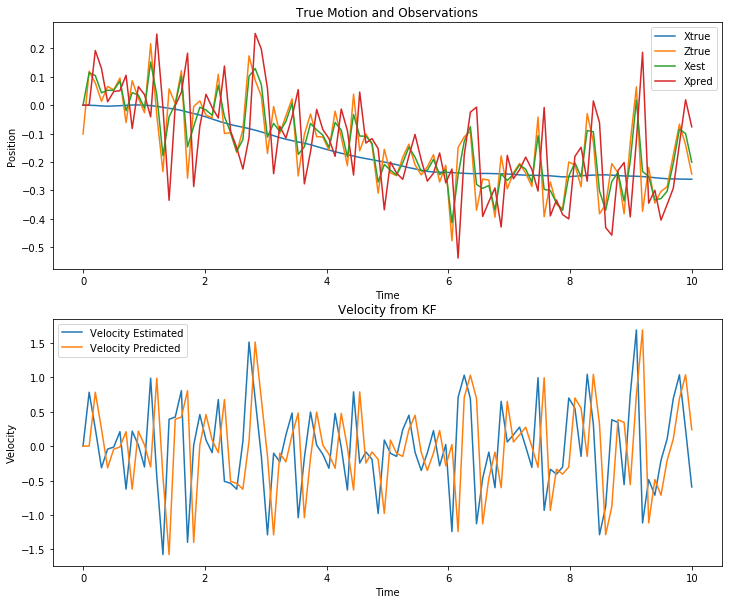

In [35]:
# set up
nt=100
dt=0.1
F=np.array([[1,dt],[0,1]])
G=np.array([[dt*dt/2],[dt]])
H=np.array([1.0,0])
B=np.array([1.0])
qstd=0.1
rstd=0.1
x0=np.array([[0],[0]])

# simulate
xt=xtrue(F,G,qstd,x0,dt,nt)
zt=obs(xt,H,rstd)
# estimate
rstd_mod = 0.001
xest,Pest,xpred,Ppred,dz,S=lkf(F,G,H,B,qstd,rstd_mod,zt,x0)
#plot
plot_true_c(xt,zt,xest,xpred,dt)

---

### Plot of Residual(?) / Innovation

In [36]:
# set up
nt=100
dt=0.1
F=np.array([[1,dt],[0,1]])
G=np.array([[dt*dt/2],[dt]])
H=np.array([1.0,0])
B=np.array([1.0])
qstd=0.1
rstd=0.1
x0=np.array([[0],[0]])

# simulate
xt=xtrue(F,G,qstd,x0,dt,nt)
zt=obs(xt,H,rstd)
# estimate
xest,Pest,xpred,Ppred,dz,S=lkf(F,G,H,B,qstd,rstd,zt,x0)

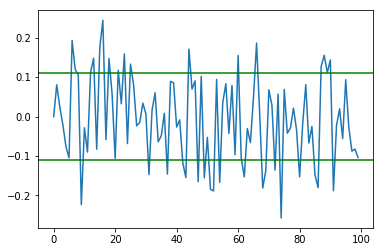

In [49]:
dz_std = dz.flatten().std()
plt.plot(dz.flatten())
plt.axhline(y=dz_std, xmin=0, xmax=1, color = "g")
plt.axhline(y=-dz_std, xmin=0, xmax=1, color= "g")